Bayes Point machine et classification d’images

In [1]:
pip install split-folders

Note: you may need to restart the kernel to use updated packages.


In [35]:
import os
import splitfolders 


input_dir = os.path.join('C:/Users/lilia/Downloads/archive/flowers')
output_dir = os.path.join('C:/Users/lilia/Downloads/archive/flowers_splitted')

splitfolders.ratio(input_dir, output=output_dir, seed=1337, ratio=(.8, .2), group_prefix=None)


Copying files: 4317 files [00:18, 235.07 files/s]


In [36]:
train_dir = os.path.join('C:/Users/lilia/Downloads/archive/flowers_splitted/train/')
test_dir = os.path.join('C:/Users/lilia/Downloads/archive/flowers_splitted/val/')

In [37]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def image_generator(train_parent_directory, test_parent_directory):
    
    train_datagen = ImageDataGenerator(rescale=1/255)
    test_datagen = ImageDataGenerator(rescale=1/255)
    
    train_generator = train_datagen.flow_from_directory(train_parent_directory,
                                  target_size = (75,75),
                                  batch_size = 214,
                                  class_mode = 'categorical',
                                  subset='training')
 
    
    test_generator = test_datagen.flow_from_directory(test_parent_directory,
                                 target_size=(75,75),
                                 batch_size = 37,
                                 class_mode = 'categorical')    
    
    return train_generator, test_generator

In [38]:
train_generator, test_generator = image_generator(train_dir, test_dir)

Found 3452 images belonging to 5 classes.
Found 865 images belonging to 5 classes.


In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout

model = Sequential([
    Conv2D(input_shape=(75,75,3), filters=8, kernel_size=16, activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.2),
    Dense(units=5, activation='softmax')
])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 60, 60, 8)         6152      
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 30, 30, 8)        0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 28, 28, 32)        2336      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 6, 6, 64)        

In [40]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [41]:
history = model.fit(
      train_generator,
      steps_per_epoch=10,  
      epochs=100,
      verbose=1)

Epoch 1/100
10/10 [==============================] - 21s 2s/step - loss: 1.5794 - accuracy: 0.2666
Epoch 2/100
10/10 [==============================] - 20s 2s/step - loss: 1.4458 - accuracy: 0.3695
Epoch 3/100
10/10 [==============================] - 22s 2s/step - loss: 1.3428 - accuracy: 0.3841
Epoch 4/100
10/10 [==============================] - 22s 2s/step - loss: 1.2753 - accuracy: 0.4432
Epoch 5/100
10/10 [==============================] - 22s 2s/step - loss: 1.2207 - accuracy: 0.4703
Epoch 6/100
10/10 [==============================] - 22s 2s/step - loss: 1.2193 - accuracy: 0.4908
Epoch 7/100
10/10 [==============================] - 22s 2s/step - loss: 1.2050 - accuracy: 0.4923
Epoch 8/100
10/10 [==============================] - 22s 2s/step - loss: 1.1833 - accuracy: 0.4898
Epoch 9/100
10/10 [==============================] - 22s 2s/step - loss: 1.1790 - accuracy: 0.4949
Epoch 10/100
10/10 [==============================] - 21s 2s/step - loss: 1.1464 - accuracy: 0.5082
Epoch 11/

In [20]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


[[2.5109950e-05 9.9997389e-01 7.1921284e-07 2.0697057e-07 5.4980065e-09]]

dandelion


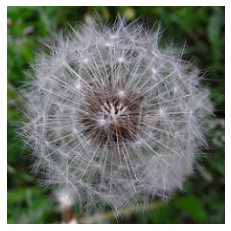

In [52]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

def import_and_predict(image_data, label):
    
    #read image
    img = cv2.imread(image_data)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
    
    #show the image
    plt.imshow(img)
    plt.axis('off')
    
    # resize and reshape the image
    img_resize = (cv2.resize(img, dsize=(75, 75), interpolation=cv2.INTER_CUBIC))/255.
    
    img_reshape = img_resize[np.newaxis,...]
    
    #predict the image
    prediction = model.predict(img_reshape)
    print(prediction)
    
    label_prediction = label[np.argmax(prediction)]
    
    return label_prediction
 
label = os.listdir(test_dir)
image1_dir = os.path.join(test_dir+'dandelion/3696596109_4c4419128a_m.jpg')

prediction = import_and_predict(image1_dir, label)
print("")
print(prediction)

[[3.6305669e-04 9.7286357e-03 8.4604466e-01 3.6723018e-03 1.4019139e-01]]

rose


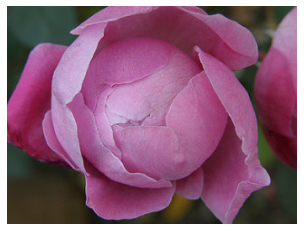

In [54]:
image2_dir = os.path.join(test_dir+'rose/5159317458_bbb22e2f65_n.jpg')

prediction = import_and_predict(image2_dir, label)
print("")
print(prediction)

In [59]:
import tensorflow as tf
import tensorflow_probability as tfp

tfd = tfp.distributions
tfpl = tfp.layers

In [60]:
divergence_fn = lambda q,p,_:tfd.kl_divergence(q,p)/3457

model_bayes = Sequential([
    
    tfpl.Convolution2DReparameterization(input_shape=(75,75,3), filters=8, kernel_size=16, activation='relu',
                                           kernel_prior_fn = tfpl.default_multivariate_normal_fn,
                                           kernel_posterior_fn=tfpl.default_mean_field_normal_fn(is_singular=False),
                                           kernel_divergence_fn = divergence_fn,
                                           bias_prior_fn = tfpl.default_multivariate_normal_fn,
                                           bias_posterior_fn=tfpl.default_mean_field_normal_fn(is_singular=False),
                                           bias_divergence_fn = divergence_fn),
    MaxPooling2D(2,2),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.2),
    tfpl.DenseReparameterization(units=tfpl.OneHotCategorical.params_size(5), activation=None,
                                    kernel_prior_fn = tfpl.default_multivariate_normal_fn,
                                    kernel_posterior_fn=tfpl.default_mean_field_normal_fn(is_singular=False),
                                    kernel_divergence_fn = divergence_fn,
                                    bias_prior_fn = tfpl.default_multivariate_normal_fn,
                                    bias_posterior_fn=tfpl.default_mean_field_normal_fn(is_singular=False),
                                    bias_divergence_fn = divergence_fn
                                ),
    tfpl.OneHotCategorical(5)
    
])
model_bayes.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_reparameterization_2  (None, 60, 60, 8)        12304     
  (Conv2DReparameterization)                                     
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 30, 30, 8)        0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 28, 28, 32)        2336      
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 12, 12, 64)        18496     
                                                      

In [61]:
from tensorflow.keras.optimizers import Adam

def negative_log_likelihood(y_true, y_pred):
    return -y_pred.log_prob(y_true)

model_bayes.compile(loss = negative_log_likelihood,
              optimizer = Adam(learning_rate=0.005),
              metrics = ['accuracy'],
              experimental_run_tf_function = False)

In [62]:
history_bayes = model_bayes.fit(
      train_generator,
      epochs=300,
      verbose=1)

Epoch 1/300
17/17 [==============================] - 39s 2s/step - loss: 8.0915 - accuracy: 0.1996
Epoch 2/300
17/17 [==============================] - 34s 2s/step - loss: 7.7664 - accuracy: 0.2129
Epoch 3/300
17/17 [==============================] - 36s 2s/step - loss: 7.5650 - accuracy: 0.2222
Epoch 4/300
17/17 [==============================] - 38s 2s/step - loss: 7.3821 - accuracy: 0.2375
Epoch 5/300
17/17 [==============================] - 38s 2s/step - loss: 7.1646 - accuracy: 0.2552
Epoch 6/300
17/17 [==============================] - 38s 2s/step - loss: 6.9733 - accuracy: 0.2827
Epoch 7/300
17/17 [==============================] - 40s 2s/step - loss: 6.7915 - accuracy: 0.2871
Epoch 8/300
17/17 [==============================] - 38s 2s/step - loss: 6.6006 - accuracy: 0.2932
Epoch 9/300
17/17 [==============================] - 38s 2s/step - loss: 6.4169 - accuracy: 0.3065
Epoch 10/300
17/17 [==============================] - 38s 2s/step - loss: 6.2276 - accuracy: 0.3189
Epoch 11/

In [63]:
import numpy as np
import matplotlib.pyplot as plt

def import_and_predict_bayes(image, true_label):

    #read image
    img = cv2.imread(image)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
    
    #show the image
    plt.imshow(img)
    plt.axis('off')
    
    img_resize = (cv2.resize(img, dsize=(75, 75), interpolation=cv2.INTER_CUBIC))/255.
    
    predicted_probabilities = np.empty(shape=(300, 5))
    
    for i in range(300):
        
        predicted_probabilities[i] = model_bayes(img_resize[np.newaxis,...]).mean().numpy()[0]
        
    pct_2p5 = np.array([np.percentile(predicted_probabilities[:, i], 2.5) for i in range(5)])
    pct_97p5 = np.array([np.percentile(predicted_probabilities[:, i], 97.5) for i in range(5)])
    
    fig, ax = plt.subplots(figsize=(12, 6))
    bar = ax.bar(np.arange(5), pct_97p5, color='red')
    bar[true_label].set_color('green')
    bar = ax.bar(np.arange(5), pct_2p5-0.02, color='white')
    ax.set_xticklabels([''] + [x for x in label])
    ax.set_ylim([0, 1])
    ax.set_ylabel('Probability')
    plt.show()

<ipython-input-63-6d7c933e944d>:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + [x for x in label])


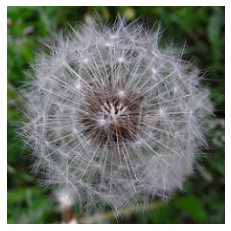

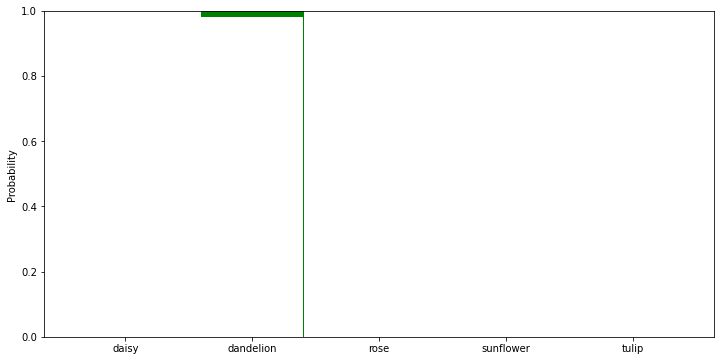

In [64]:
import_and_predict_bayes(image1_dir, label.index('dandelion'))

<ipython-input-63-6d7c933e944d>:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + [x for x in label])


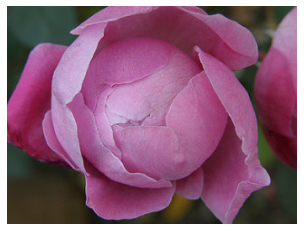

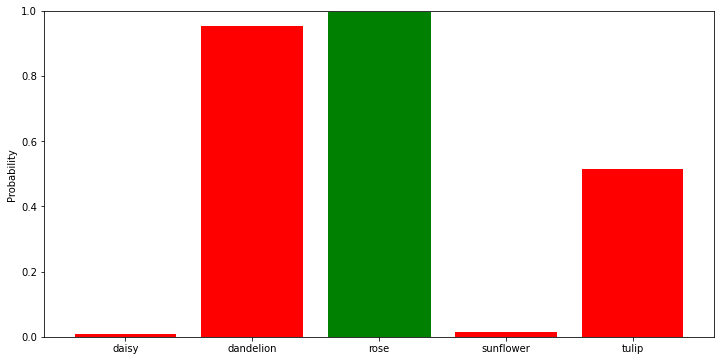

In [65]:
import_and_predict_bayes(image2_dir, label.index('rose'))